In [1]:
#importing libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as py

In [2]:
#loading dataset
data=pd.read_csv(r"C:\Users\acer\Desktop\cardio_train.csv", sep=';',encoding= 'unicode_escape')


In [3]:
data.head()




,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
#Stats about Data.

data.describe() 

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#We need to know information about data and datatype.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
#We will check the shape of the data

data.shape

(70000, 13)

In [7]:
#Check if null values in the columns.

data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
#As age feature is given in number of days so what we do is convert it into years


data['age']=data['age']/365

In [9]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
#Lets first drop the column id as its not important

data=data.drop('id',axis=1)

In [11]:
#Lets Check whether the change is made

data.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [12]:
#Now as the features are not understood i will replace them with the original name

data.rename(columns={'ap_hi': 'systolic', 'ap_lo': 'diastolic', 'gluc': 'glucose', 'alco': 'alcohol', 'cardio': 'cardiovascular disease'}, inplace=True)

In [13]:
data.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [14]:
# Now the we have to predict cardiovascular disease so lets rename this column and set it as target

data.rename(columns={'cardiovascular disease': 'target'},inplace='True')

In [15]:
# Check Duplicate entries
data.duplicated().sum()

24

In [16]:
data[data.duplicated()]

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target
10562,56.150685,1,165,70.0,120,80,1,1,0,0,1,0
21784,46.008219,1,165,68.0,120,80,1,1,0,0,1,0
38505,52.021918,1,164,65.0,120,80,1,1,0,0,1,0
40365,39.868493,1,158,64.0,120,80,1,1,0,0,1,0
42450,50.282192,1,169,67.0,120,80,1,1,0,0,1,0
44653,46.402740,2,170,70.0,120,80,1,1,0,0,0,0
45125,58.301370,1,165,65.0,120,80,1,1,0,0,1,0
45748,60.484932,1,175,69.0,120,80,1,1,0,0,1,1
45810,58.164384,1,164,62.0,120,80,1,1,0,0,1,0
48917,60.123288,1,165,60.0,120,80,1,1,0,0,1,0


In [17]:
#Dropping these duplicate values

data.drop_duplicates(inplace=True)

In [18]:
data.describe()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,53.339589,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,6.759930,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
#The values for weights and heights at maximum are unlikely or outliers.
#So remove weights and heights, that fall below 2.5% or above 97.5% of a given range.

data.drop(data[(data['height'] > data['height'].quantile(0.975)) | (data['height'] < data['height'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['weight'] > data['weight'].quantile(0.975)) | (data['weight'] < data['weight'].quantile(0.025))].index,inplace=True)

In [20]:
data.describe()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target
count,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000
mean,53.349959,1.347890,164.497823,73.546415,128.818912,95.959462,1.359184,1.222737,0.086385,0.052896,0.803672,0.498277
std,6.745524,0.476305,6.863199,11.721811,161.017939,186.322126,0.674872,0.568992,0.280934,0.223828,0.397223,0.500001
min,29.583562,1.000000,150.000000,52.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.438356,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.986301,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.419178,2.000000,169.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,180.000000,106.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63842 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          63842 non-null  float64
 1   gender       63842 non-null  int64  
 2   height       63842 non-null  int64  
 3   weight       63842 non-null  float64
 4   systolic     63842 non-null  int64  
 5   diastolic    63842 non-null  int64  
 6   cholesterol  63842 non-null  int64  
 7   glucose      63842 non-null  int64  
 8   smoke        63842 non-null  int64  
 9   alcohol      63842 non-null  int64  
 10  active       63842 non-null  int64  
 11  target       63842 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.3 MB


Yes 32031
No 31811


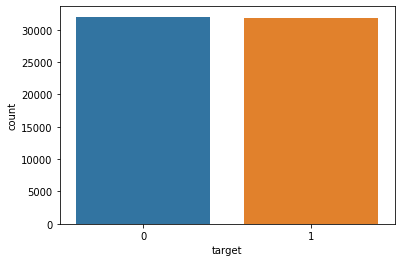

In [22]:
#After cleaning,Now i need to check whether the dataset is balanced or imbalanced.
#To draw various insights from data we will use visualization techniques


ax=sns.countplot(data['target'],label = 'Count')
Diseased,NotDiseased=data['target'].value_counts()
print('Diseased', Y)
print('NotDiseased', N)

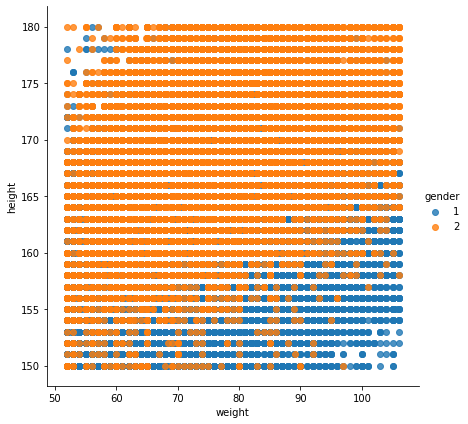

In [23]:
#to check weights and heights of males and females

sns.lmplot(x='weight', y='height', hue='gender', data=data, fit_reg=False, height=6)
py.show()

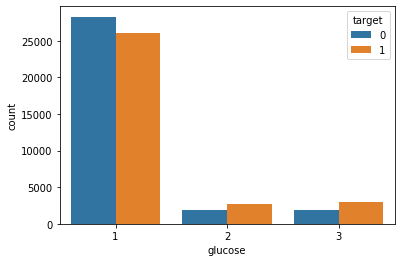

In [24]:
#Exploratory Data Analysis
#Now lets try to find correlation of features with the target

#correlation between glucose with target

#normal level=1,above normal=2,high=3

sns.countplot(x='glucose', hue='target', data=data)
py.show()


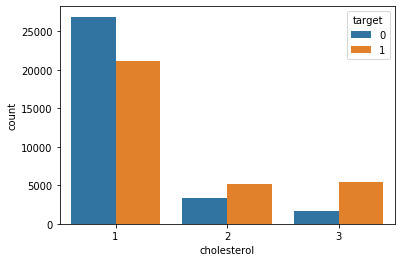

In [25]:
sns.countplot(x='cholesterol', hue='target', data=data)
py.show()

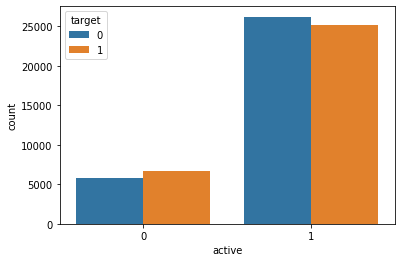

In [26]:
sns.countplot(x='active', hue='target', data=data)
py.show()

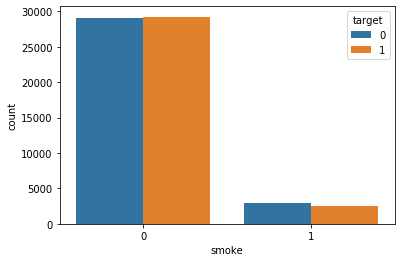

In [27]:
sns.countplot(x='smoke', hue='target', data=data)
py.show()

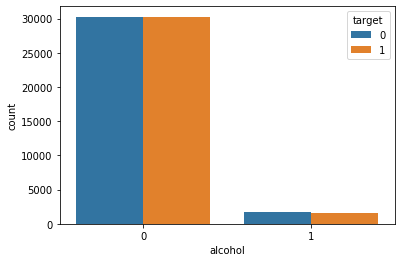

In [28]:
sns.countplot(x='alcohol', hue='target', data=data)
py.show()

In [29]:
#I will move to feature engineering before that we need to add up one feature Body Mass Index .
#to check what are the chances for persons  getting a disease because being obese,underweight etc..
#i will define a function for BMI


def BMI(data):
    return data['weight'] / (data['height']/100)**2
 
data['bmi'] = data.apply(BMI, axis=1)

In [30]:
data.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target,bmi
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [31]:
#On the basis of BMI we assign weight_status feature  under different catagories

data['weight_status'] = data['bmi'].apply(lambda x :'Underweight' if x <= 18.5 else ('Normal' if (x > 18.5 and x <= 24.9) else ( 'Overweight' if (x > 24.9 and x <= 29.9) else 'obese')) )

In [32]:
# i will use pulse indicator that also has a effect on target

data['pulse pressure'] = data['systolic'] - data['diastolic']

In [33]:
# To check High BMI value person correlation to cardio vascular diseases

data[(data['pulse pressure'] >= 60 ) & (data['cholesterol'] == 3)].head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target,bmi,weight_status,pulse pressure
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,Normal,60
24,45.501370,1,170,68.0,150,90,3,1,0,0,1,1,23.529412,Normal,60
61,57.424658,2,165,75.0,180,90,3,1,0,0,1,1,27.548209,Overweight,90
194,60.243836,1,162,62.0,140,80,3,1,0,0,1,1,23.624447,Normal,60
221,48.194521,1,157,70.0,160,100,3,1,0,0,0,1,28.398718,Overweight,60


In [34]:
# Splitting data into training and testing datasets


X = data.drop(['weight_status', 'target'], axis=1)
y = data['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=2)

In [35]:
#Now we will do scaling of data by feature scaling by importing library StandardScaleer

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [36]:
#Check length of train set 

len(X_train)

57457

In [37]:
len(y_train)

57457

In [38]:
#Model Selection

#As of know i have done the data cleaning,removing outliers,feature enginering and selction.
# Now i will use different classification algorithms for predicting the disease.

#Ensembling Technique Random forest

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)





RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
#Now test with classifier y_pred

y_pred= classifier.predict(X_test)

In [40]:
# Now the evaluation of the randomforest model
#To check the accuracy and Confusion matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[2274  910]
 [ 990 2211]]


In [41]:
#checking accuracy of the model

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.7024275646045419

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      3184
           1       0.71      0.69      0.70      3201

    accuracy                           0.70      6385
   macro avg       0.70      0.70      0.70      6385
weighted avg       0.70      0.70      0.70      6385



In [48]:
#Cross validation of the model by importing inbuilt cross val score library

from sklearn.model_selection import cross_val_score
accuracies_classifier = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

In [50]:
# check accuracies

accuracies_classifier

array([0.7234598 , 0.71858684, 0.70692656, 0.71406196, 0.70518622,
       0.71023321, 0.71040724, 0.70861619, 0.70008703, 0.70304613])

In [51]:
#using Support vector machines

from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [52]:
y_pred_svc = svc.predict(X_test)

In [55]:
# SVM Model Evaluation
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

[[2400  784]
 [1005 2196]]
              precision    recall  f1-score   support

           0       0.70      0.75      0.73      3184
           1       0.74      0.69      0.71      3201

    accuracy                           0.72      6385
   macro avg       0.72      0.72      0.72      6385
weighted avg       0.72      0.72      0.72      6385



In [ ]:
svc.score(X_test, y_test)

In [53]:
#Applying k-Fold Cross Validation
accuracies_svc = cross_val_score(estimator=svc, X=X_train, y=y_train, cv=10, n_jobs=4)


In [54]:
accuracies_svc

array([0.72485207, 0.73424991, 0.71702054, 0.72885486, 0.72258963,
       0.72485207, 0.73198747, 0.72515231, 0.72062663, 0.7129678 ])

In [56]:
#Using K-NearestNeighbour algorithm


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [ ]:
y_pred_knn = knn.predict(X_test)


In [ ]:
# KNN Model Evaluation
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

In [ ]:
knn(X_test,y_test)

In [ ]:
#Cross validation of KNN model

accuracies_knn = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=10)

In [ ]:
accuracies_knn

In [ ]:
# Using XGBoost algorithm
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600)
xgb.fit(X_train, y_train)

In [ ]:
y_pred_xgb = xgb.predict(X_test)

In [ ]:
# XGBoost Model Evaluation
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

In [ ]:
xgb.score(X_test, y_test)

In [ ]:
#Applying k-Fold Cross Validation
accuracies_xgb = cross_val_score(estimator=xgb, X=X_train, y=y_train, cv=10)

In [ ]:
accuracies_xgb

In [ ]:
accuracies_xgb_mean

In [ ]:
###################################### XGB Boost With Mean accuracy 72.2 ####################### 
######################## Can Go For ANN classification Goto Https://github.com/umanniyaz##########################